In [1]:
import pickle
import os
import matplotlib.pyplot as plt
import numpy as np


In [2]:
print(len(plt.style.available))
styles = plt.style.available
plt.style.available

29


['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [3]:
models_name = ['llama3', 'opt', 'qwen']

def get_model_files(model_name):
    model_files = []
    print('Found the following files for model ', model_name)
    for file in os.listdir('/home/hanwenli/work/2025/AL_SSL/results/'):
        if file.startswith(model_name):
            model_files.append(file)
            print(file)
    return model_files


Found the following files for model  Mistral
Mistral-7B-Instruct-v0.3_truthful_qa.pkl
Mistral-7B-Instruct-v0.3_coqa.pkl
Mistral-7B-Instruct-v0.3_simple_qa.pkl
Mistral-7B-Instruct-v0.3_trivia_qa.pkl


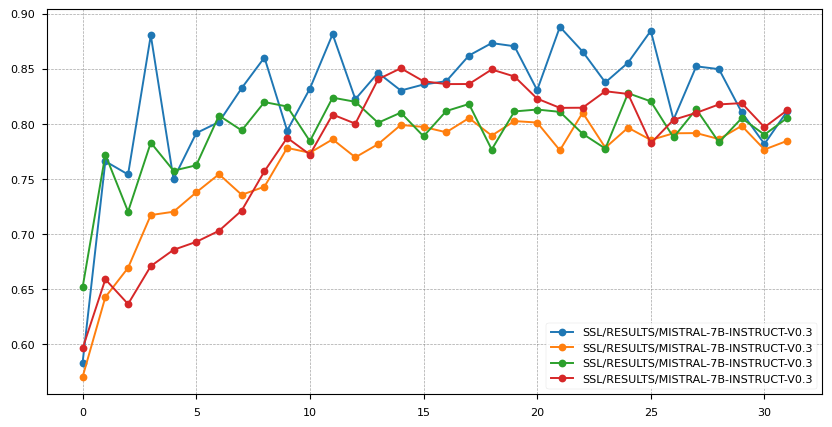

In [4]:
files = get_model_files('Mistral')

aurocs = []
plt.style.use('seaborn-v0_8-paper')
plt.figure(figsize=(10, 5))

for file in files:
    file = os.path.join('/home/hanwenli/work/2025/AL_SSL/results/', file)
    with open(file, 'rb') as f:
        data = pickle.load(f)
        auroc = np.array([lay['auroc'] for lay in data])
        aurocs.append(auroc)
        plt.plot(auroc, marker='o', label=(file.split('_', 2)[1:2])[0].upper())

# plt.xlabel('Layer')
# plt.ylabel('AUROC')
# plt.title('AUROC vs Layer for Different Datasets')
plt.legend()
plt.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

plt.savefig('auroc_vs_layer_qwen.png')
plt.show()

In [57]:
files = get_model_files('qwen')

data_lines = []
colors = ["#C4C4C4", "#778da9", "#1b263b"]
for i, file in enumerate(files):
    file = os.path.join('/home/hanwenli/work/2025/AL_SSL/results/', file)
    print(file)
    with open(file, 'rb') as f:
        data = pickle.load(f)
        auroc = np.array([lay['auroc'] for lay in data])
        
        data_point = {'name': (file.split('_', 3)[2:3])[0].upper(), 'x_array': range(len(auroc)), 'y_array': auroc, 'marker': 'o', 'color': colors[i]}
        data_lines.append(data_point)
        
        
# files = get_model_files('qwen')

# colors = ["#bee9e8", "#62b6cb", "#1b4965"]
# for i, file in enumerate(files):
#     file = os.path.join('/home/hanwenli/work/2025/AL_SSL/results/', file)
#     print(file)
#     with open(file, 'rb') as f:
#         data = pickle.load(f)
#         auroc = np.array([lay['auroc'] for lay in data])
        
#         data_point = {'name': 'Qwen2.5_'+(file.split('_', 3)[2:3])[0], 'x_array': range(len(auroc)), 'y_array': auroc, 'marker': '*', 'color': colors[i]}
#         data_lines.append(data_point)

# from papergraph.dict_list.plot import ListPloter
# plotter = ListPloter()
# plotter.cfg.x_label = 'Layer'
# plotter.cfg.y_label = 'AUROC'
# plotter.cfg.title = 'AUROC vs Layer'
# plotter.plot_bars(data_lines, save_path='/home/hanwenli/work/2025/AL_SSL/result_analysis/llama3&qwen_auroc_vs_layer.png')

Found the following files for model  qwen
qwen_coqa_layer_27.pkl
qwen_sciq_layer_27.pkl
qwen_trivia_qa_layer_27.pkl
/home/hanwenli/work/2025/AL_SSL/results/qwen_coqa_layer_27.pkl
/home/hanwenli/work/2025/AL_SSL/results/qwen_sciq_layer_27.pkl
/home/hanwenli/work/2025/AL_SSL/results/qwen_trivia_qa_layer_27.pkl


In [13]:
data_lines

[{'name': 'LLaMa3_sciq',
  'x_array': range(0, 32),
  'y_array': array([0.50015514, 0.6845269 , 0.68533973, 0.70213689, 0.70524713,
         0.68416567, 0.71953115, 0.70497386, 0.73371437, 0.74789106,
         0.76247029, 0.77518379, 0.77429626, 0.80141572, 0.77162655,
         0.79750552, 0.80143428, 0.79568586, 0.78860505, 0.80384835,
         0.7611661 , 0.78611115, 0.77241527, 0.7908779 , 0.78601036,
         0.7806541 , 0.7708672 , 0.77641493, 0.78446524, 0.76996818,
         0.7952631 , 0.80087258]),
  'marker': 'o',
  'color': '#bee9e8'},
 {'name': 'LLaMa3_coqa',
  'x_array': range(0, 32),
  'y_array': array([0.50208117, 0.62496353, 0.6945029 , 0.75577678, 0.76791232,
         0.77910838, 0.77755861, 0.77892389, 0.79194307, 0.79415175,
         0.80442541, 0.80955305, 0.8098506 , 0.80504866, 0.81222498,
         0.79215414, 0.79813667, 0.81386772, 0.81686045, 0.8027915 ,
         0.80534778, 0.81210225, 0.81495473, 0.80273754, 0.81239573,
         0.79767998, 0.81396389, 0.80047

In [ ]:

# AUROC values
auroc_values_trivia_qa = [
    0.6843361711919006, 0.8580878969167051, 0.8664432811780949,
    0.8837916091425065, 0.8838395459426294, 0.874453520478601,
    0.8680204019021323, 0.8740796134376438, 0.8825740144193895,
    0.8725935726338395, 0.8852680625862861, 0.8728620187145267,
    0.8820754716981132, 0.8818741371375979
]

# Corresponding labeled data sizes (25 to 400, evenly spaced)
labeled_data_sizes = list(range(25, 425, 25)[2:])  # step=25, ends at 400

# Plot
plt.figure(figsize=(10, 5))
plt.plot(labeled_data_sizes, auroc_values_trivia_qa, marker='o', label='TRIVIA_QA')

plt.grid(True, color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.savefig('data_e.png')
plt.show()


In [ ]:
r = []
for i in range(len(aurocs[0])):
    total = 0
    for j in range(len(aurocs)):
        total += aurocs[j][i]
    r.append(total)
r.index(max(r))


# Calculate the AUROC

In [1]:
import pickle
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def get_model_files(model_name):
    model_files = []
    print('Found the following files for model ', model_name)
    for file in os.listdir('/home/hanwenli/work/2025/AL_SSL/results/'):
        if file.startswith(model_name):
            model_files.append(file)
            print(file)
    return model_files

In [3]:
files = get_model_files('llama3')

data_lines = []
colors = ["#C4C4C4", "#778da9", "#1b263b"]
for i, file in enumerate(files):
    file = os.path.join('/home/hanwenli/work/2025/AL_SSL/results/', file)
    print(file)
    with open(file, 'rb') as f:
        data = pickle.load(f)
        auroc = np.array([lay['auroc'] for lay in data])
        
        data_point = {'name': (file.split('_', 3)[2:3])[0].upper(), 'x_array': range(len(auroc)), 'y_array': auroc, 'marker': 'o', 'color': colors[i]}
        data_lines.append(data_point)

Found the following files for model  llama3
llama3_sciq_layer_31.pkl
llama3_coqa_layer_31.pkl
llama3_trivia_qa_layer_31.pkl
/home/hanwenli/work/2025/AL_SSL/results/llama3_sciq_layer_31.pkl
/home/hanwenli/work/2025/AL_SSL/results/llama3_coqa_layer_31.pkl
/home/hanwenli/work/2025/AL_SSL/results/llama3_trivia_qa_layer_31.pkl


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def plot_bar_chart(data, title="Performance Over Training Steps (Odd Steps)", 
                  x_label="Training Step", y_label="Accuracy",
                  figsize=(10, 7), save_path=None):
    """
    Draw a bar chart for the y_array data with odd x_array indices only.
    Each dataset (name) will use its specific color.
    The first and last columns will be close to the borders.
    Bars are extra wide for better visibility.
    
    Parameters:
    -----------
    data : list of dict
        Each dict should contain 'name', 'x_array', 'y_array', and 'color' keys
    title : str
        Title of the plot
    x_label : str
        Label for x-axis
    y_label : str
        Label for y-axis
    figsize : tuple
        Figure size (width, height)
    save_path : str or None
        Path to save the figure, if None, the figure will not be saved
        
    Returns:
    --------
    fig, ax : matplotlib figure and axis objects
    """
    # Set the seaborn theme
    sns.set_theme(style="whitegrid", context="paper")
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=figsize)
    
    # Filter to keep only odd indices
    filtered_data = []
    for dataset in data:
        # Get odd indices
        odd_indices = [i for i in range(len(dataset['x_array'])) if i % 2 == 1]
        
        # Create filtered dataset
        filtered = {
            'name': dataset['name'],
            'x_array': [dataset['x_array'][i] for i in odd_indices],
            'y_array': np.array([dataset['y_array'][i] for i in odd_indices]),
            'color': dataset['color']
        }
        filtered_data.append(filtered)
    
    # Number of datasets and steps
    num_datasets = len(filtered_data)
    num_steps = len(filtered_data[0]['x_array'])
    
    # Width of each bar - INCREASED for extra wide bars
    # Using 1.8 instead of 1.2 to make bars 50% wider again
    width = 1.8 / num_datasets
    
    # Plot bars for each dataset
    for i, dataset in enumerate(filtered_data):
        # Position offset for this dataset's bars
        offset = (i - (num_datasets-1)/2) * width
        
        # Get x and y values
        x_values = dataset['x_array']
        y_values = dataset['y_array']
        
        # Plot the bars
        bars = ax.bar(np.array(x_values) + offset, y_values, 
                     width=width, color=dataset['color'], 
                     label=dataset['name'])
    
    # Add labels and title
    plt.xlabel(x_label, fontsize=20)
    plt.ylabel(y_label, fontsize=20)
    plt.title(title, fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    
    # Set x-ticks to be exactly at the step positions
    ax.set_xticks(filtered_data[0]['x_array'])
    
    # Set y-axis limits to focus on the range of values
    all_y_values = np.concatenate([d['y_array'] for d in filtered_data])
    y_min = np.min(all_y_values) * 0.95  # 5% margin below minimum
    y_max = np.max(all_y_values) * 1.02  # 2% margin above maximum
    ax.set_ylim(y_min, y_max)
    
    # Adjust the plot margins to bring the first and last columns close to the borders
    plt.subplots_adjust(left=0.05, right=0.97)
    
    # Adjust the axis limits to ensure first and last columns are close to borders
    # Expanded further to accommodate extra wide bars
    min_x = min(filtered_data[0]['x_array']) - 1.0
    max_x = max(filtered_data[0]['x_array']) + 1.0
    ax.set_xlim(min_x, max_x)
    
    # Add legend
    ax.legend(loc='upper left', fontsize=20)
    
    # Add grid for better readability
    
    # Save figure if path is provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
    
    return fig, ax

(<Figure size 1000x700 with 1 Axes>, <Axes: >)

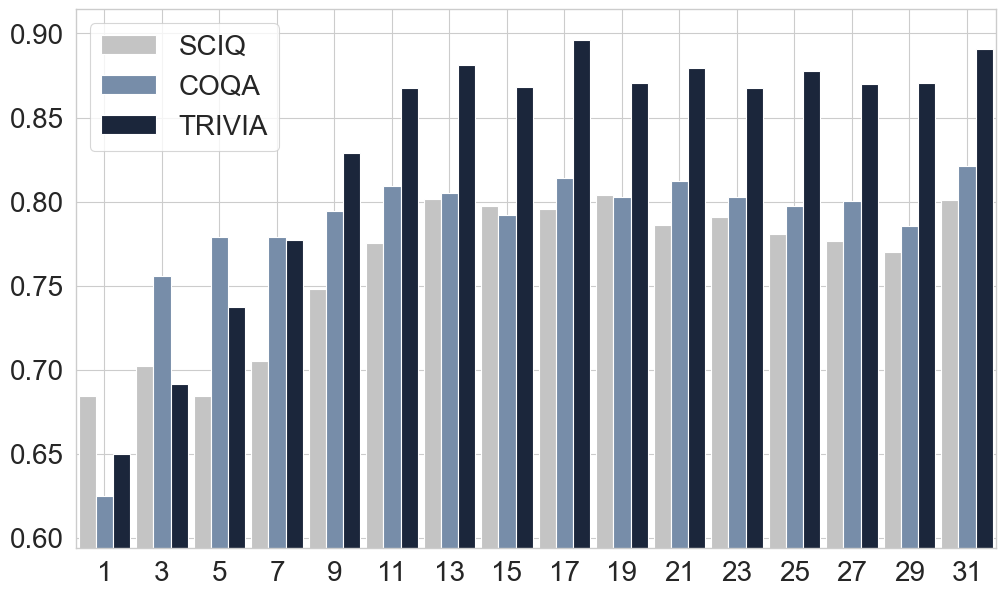

In [5]:
plot_bar_chart(data_lines, title="AUROC on Different Layers", x_label="Layers", y_label="AUROC", save_path='/home/hanwenli/work/2025/AL_SSL/result_analysis/llama8_layer_sensitivity.png')